<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basics" data-toc-modified-id="Basics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basics</a></span><ul class="toc-item"><li><span><a href="#Font-Configuration" data-toc-modified-id="Font-Configuration-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Font Configuration</a></span></li><li><span><a href="#grid-setup" data-toc-modified-id="grid-setup-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>grid setup</a></span></li><li><span><a href="#margin-configuration" data-toc-modified-id="margin-configuration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>margin configuration</a></span></li><li><span><a href="#Subplots" data-toc-modified-id="Subplots-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Subplots</a></span></li><li><span><a href="#Line-plots" data-toc-modified-id="Line-plots-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Line plots</a></span></li></ul></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data exploration</a></span><ul class="toc-item"><li><span><a href="#Correllogram" data-toc-modified-id="Correllogram-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correllogram</a></span></li><li><span><a href="#Pairwise-plot" data-toc-modified-id="Pairwise-plot-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pairwise plot</a></span></li><li><span><a href="#Density-plot" data-toc-modified-id="Density-plot-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Density plot</a></span></li></ul></li><li><span><a href="#3D-plots" data-toc-modified-id="3D-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3D plots</a></span><ul class="toc-item"><li><span><a href="#3D-line-plot" data-toc-modified-id="3D-line-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3D line plot</a></span></li><li><span><a href="#3D-scatter" data-toc-modified-id="3D-scatter-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3D scatter</a></span></li><li><span><a href="#3D-surface" data-toc-modified-id="3D-surface-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3D surface</a></span></li><li><span><a href="#Contour" data-toc-modified-id="Contour-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Contour</a></span></li></ul></li><li><span><a href="#Advanced-plots" data-toc-modified-id="Advanced-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Advanced plots</a></span><ul class="toc-item"><li><span><a href="#Stream-plot" data-toc-modified-id="Stream-plot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Stream plot</a></span></li></ul></li></ul></div>

# Basics

Global style setup
https://matplotlib.org/3.3.2/tutorials/introductory/customizing.html

## Font Configuration

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
sns.set()
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## Remove axis and ticks
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

plt.axis('off')

ax.set_axis_off()

## grid setup
```sns.set_style("whitegrid", {'axes.grid' : False})
```

## margin configuration

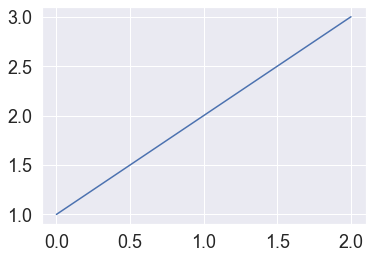

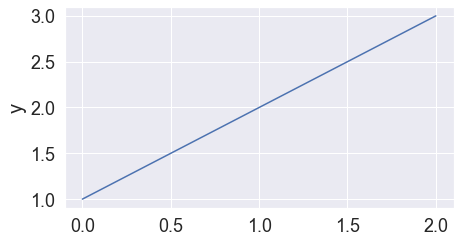

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(1)
plt.plot([1, 2, 3])
plt.subplots_adjust(left=0.15, right=0.9, wspace =0.5, hspace =0.5)

plt.figure(2)
plt.plot([1, 2, 3])
plt.subplots_adjust(left=0., bottom=0.1, right=0.9, top=0.8, wspace =0.5, hspace =0.5)
plt.ylabel('y')

plt.figure(3)
plt.tight_layout()

## Subplots

Text(0.5, 1.0, 'Lognormal')

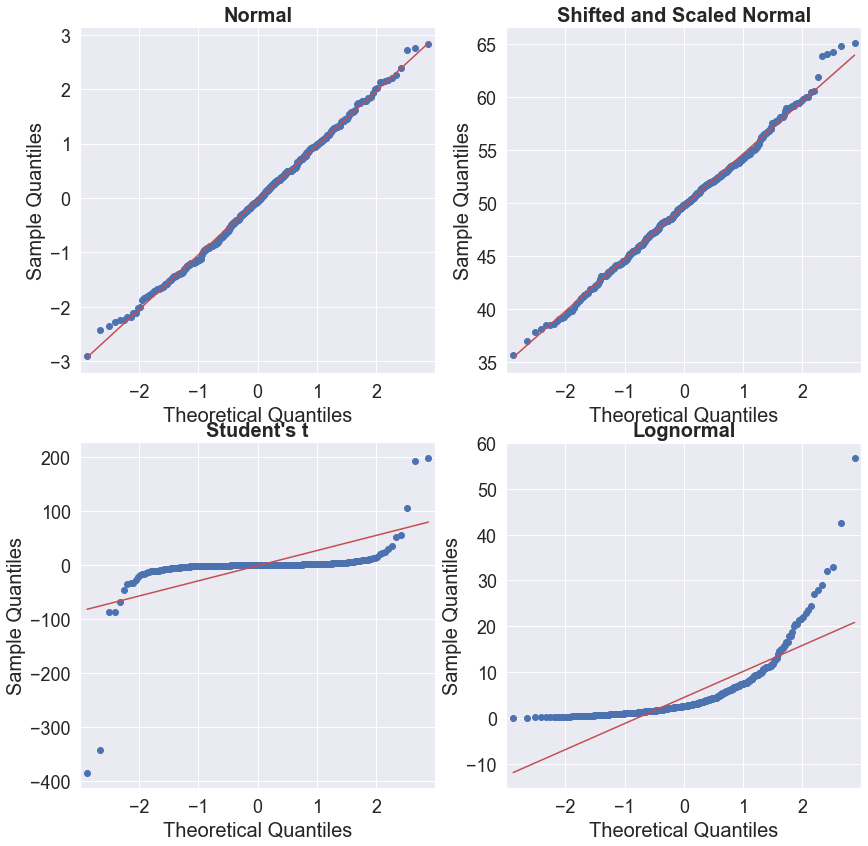

In [2]:
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
plt.figure(1, figsize=(14, 14))
nSamples = 500
# generate univariate observations
data = randn(nSamples)
# q-q plot
ax = plt.subplot(221)
qqplot(data, line='s', ax=ax)
plt.title('Normal',fontsize=20, fontweight='bold')


data = 5 * randn(nSamples) + 50
# q-q plot
ax = plt.subplot(222)
qqplot(data, line='s', ax=ax)
plt.title('Shifted and Scaled Normal',fontsize=20, fontweight='bold')


data = np.random.standard_t(1, nSamples)

ax = plt.subplot(223)
qqplot(data, line='s', ax=ax)
plt.title('Student\'s t',fontsize=20, fontweight='bold')

loc, scale = 0., 4.
data = np.random.laplace(loc, scale, nSamples)


data = np.random.lognormal(1, 1, nSamples)
ax = plt.subplot(224)
qqplot(data, line='s', ax=ax)
plt.title('Lognormal',fontsize=20, fontweight='bold')

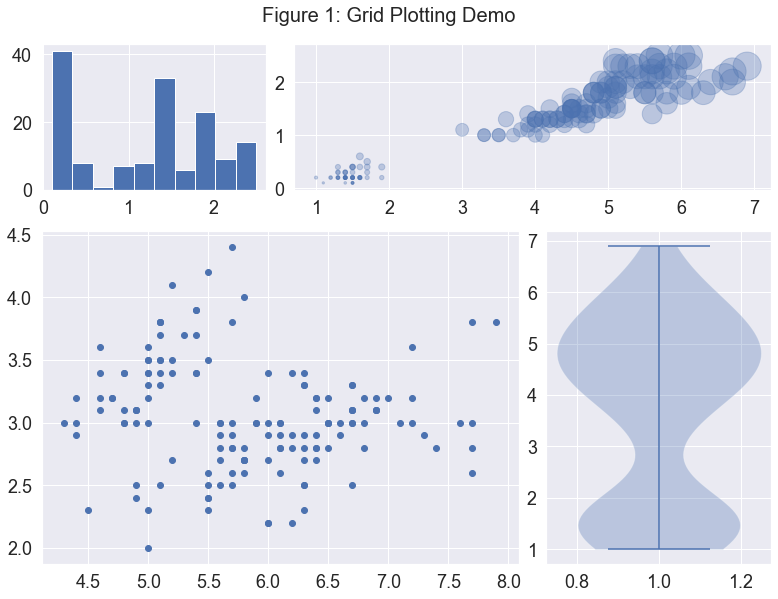

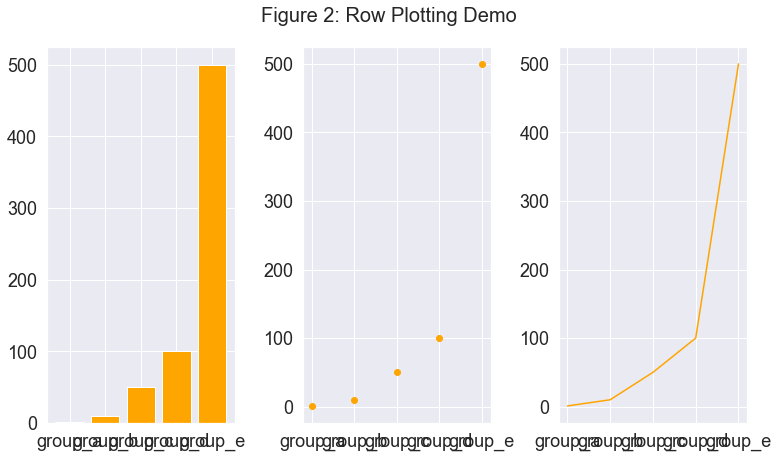

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

plt.close('all')
iris = pd.read_csv('data/iris_dataset.csv', delimiter=',')

fig = plt.figure(1, figsize=(12, 9))

ax1 = plt.subplot2grid((3, 3), (0, 0))
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
ax4 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

ax1.hist(iris['petal_width'])
ax2.scatter(iris['petal_length'], iris['petal_width'], 
            s=50*iris['petal_length']*iris['petal_width'], alpha=0.3)
ax3.scatter(iris['sepal_length'], iris['sepal_width'])
ax4.violinplot(iris['petal_length'])

plt.suptitle('Figure 1: Grid Plotting Demo', fontsize=20)
plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)

plt.figure(2, figsize=(12, 5))

names = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e']
values = [1, 10, 50, 100, 500]

plt.subplot(131)
plt.bar(names, values, color='orange')

plt.subplot(132)
plt.scatter(names, values, color='orange')

plt.subplot(133)
plt.plot(names, values, color='orange')

plt.suptitle('Figure 2: Row Plotting Demo', fontsize=20)

plt.tight_layout(pad=5, w_pad=0.5, h_pad=1.0)

plt.show();

## Line plots

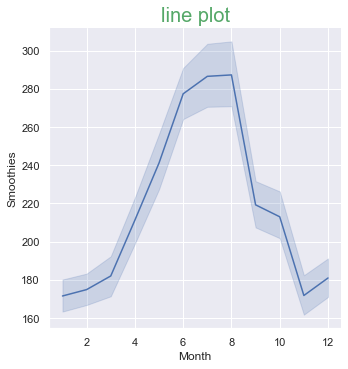

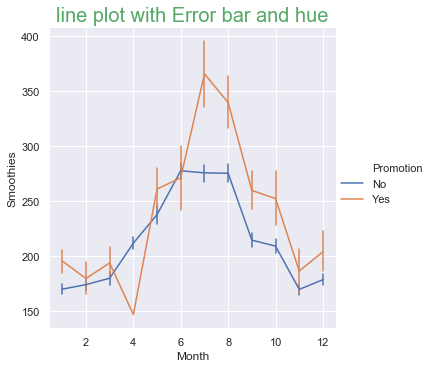

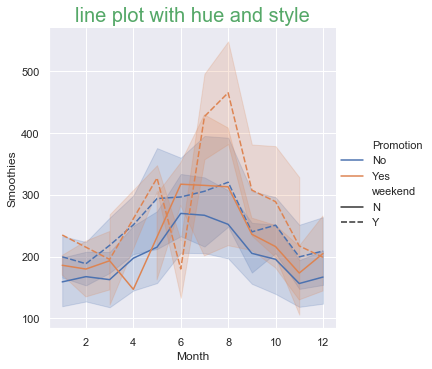

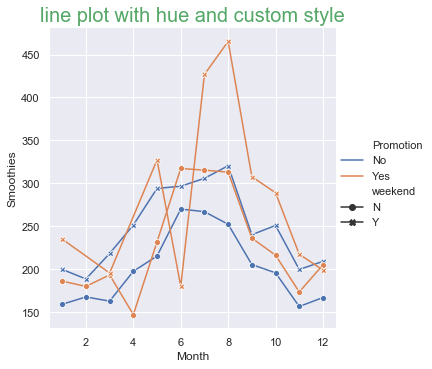

In [27]:
# When there are multiple y axis values for given x axis value, you can plot average with 
# some confidence interval
sns.set(style='darkgrid')   #All available options {darkgrid, whitegrid, dark, white, ticks}
snacks_sales = pd.read_csv('data/Snacks_Data.csv')
snacks_sales['Month'] = pd.DatetimeIndex(snacks_sales['Date']).month
Quarter_Mapping = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
snacks_sales['Quarter'] = snacks_sales['Month'].map(Quarter_Mapping)

sns.relplot(x='Month', y='Smoothies', data=snacks_sales, kind='line')
plt.title('line plot', size=20, color='g')

sns.relplot(x='Month', y='Smoothies', hue='Promotion', data=snacks_sales, kind='line',
           err_style="bars", ci=68)   # Standard Errors
plt.title('line plot with Error bar and hue', size=20, color='g')

sns.relplot(x='Month', y='Smoothies', hue='Promotion', style='weekend', 
            kind='line', ci='sd', data=snacks_sales)
plt.title('line plot with hue and style', size=20, color='g')

sns.relplot(x='Month', y='Smoothies', hue='Promotion', style='weekend', dashes=False, markers=True,
            data=snacks_sales, kind='line', ci=None)
plt.title('line plot with hue and custom style', size=20, color='g')

plt.show();

# Data exploration

## Correllogram
Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

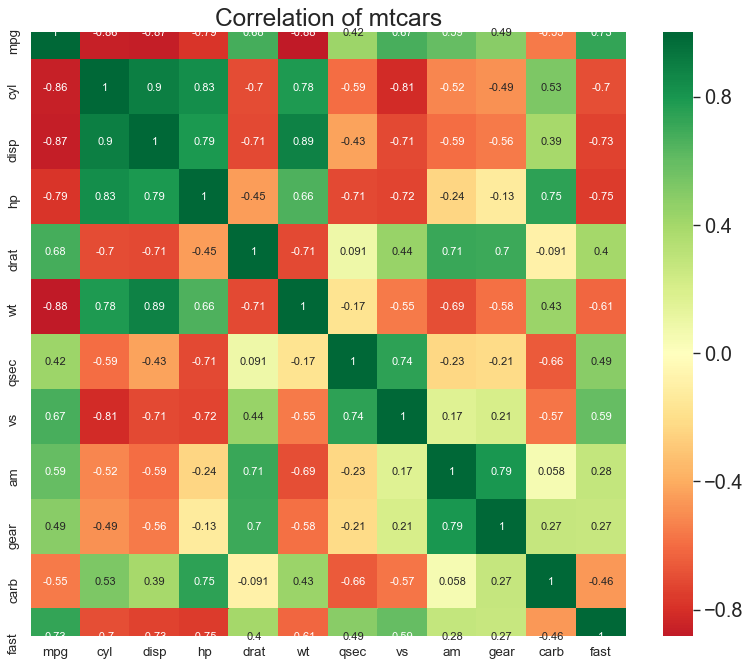

In [3]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn',center=0, annot=True)

plt.title('Correlation of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

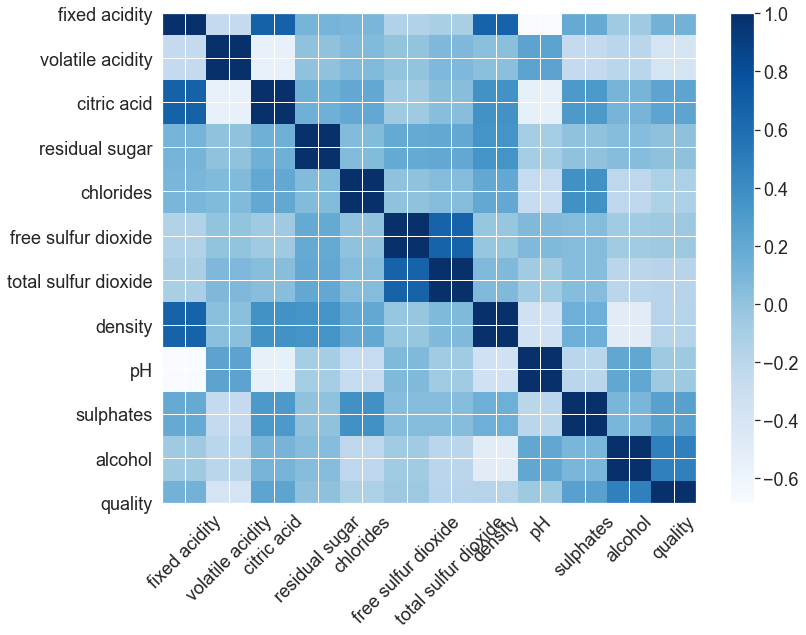

In [12]:
import pandas as pd
# Read the data from a csv file into pandas data frame
wine_quality = pd.read_csv('data/winequality.csv', delimiter=';')

# Get correlation matrix of all attributes of wine_quality
corr = wine_quality.corr()

plt.figure(figsize=(12,9))
plt.imshow(corr,cmap='Blues');
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=45)
plt.yticks(range(len(corr)),corr.columns);

## Pairwise plot
Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables. It is a must have tool for bivariate analysis.

<Figure size 800x640 with 0 Axes>

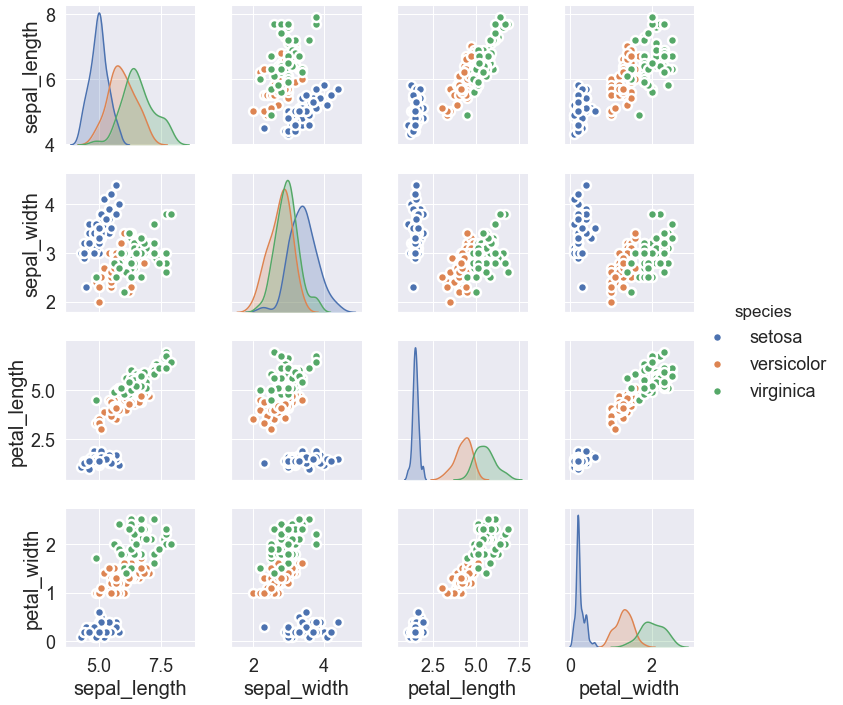

In [5]:
df = sns.load_dataset('iris')

plt.figure(figsize=(10, 8), dpi=80)
sns.pairplot(df, kind='scatter', hue='species',plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

## Density plot
Density plots are a commonly used tool visualise the distribution of a continuous variable. By grouping them by the ‘response’ variable, you can inspect the relationship between the X and the Y. The below case if for representational purpose to describe how the distribution of city mileage varies with respect the number of cylinders.

In [6]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(16,0), dpi=80)
sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
# sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
# sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
# sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
# plt.legend()
# plt.show()

Text(0.5, 1.0, 'Density Plot of City Mileage by n_Cylinders')

RuntimeError: libpng signaled error

<Figure size 1280x0 with 1 Axes>

# 3D plots

In [7]:
from mpl_toolkits import mplot3d

## 3D line plot

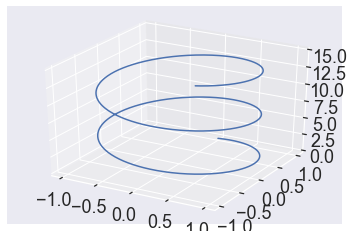

In [8]:
fig = plt.figure()
ax = plt.gca(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline);

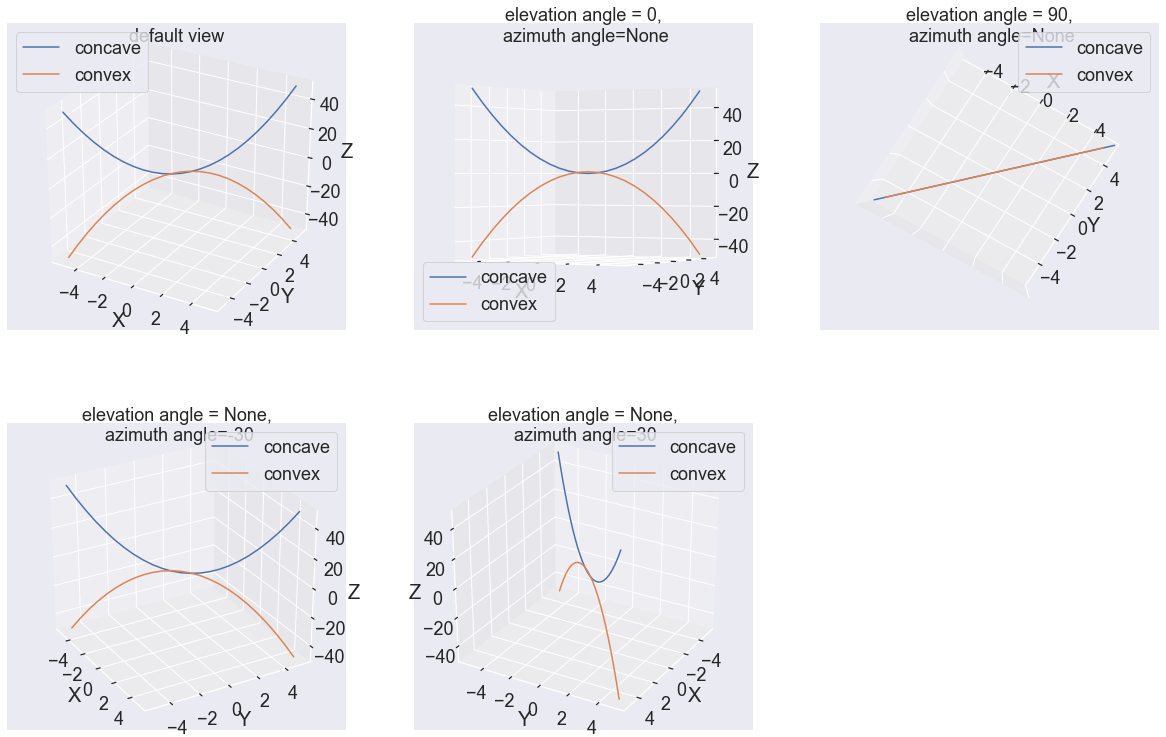

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 25)
y = np.linspace(-5, 5, 25)
z = x**2 + y**2
z1 = 1 - (x**2 + y**2)

fig = plt.figure(figsize=(20,13))
ax1 = fig.add_subplot(231, projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, wspace=0.2, hspace=0.3)  #added for 3.0

def plot_graph(axes, xlabel, ylabel, zlabel, title, elevation, rotation):
    axes.plot3D(x, y, z, label='concave')
    axes.plot(x, y, z1, label='convex')
    axes.view_init(elev=elevation, azim=rotation)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_zlabel(zlabel)
    axes.set_title(title)
    axes.legend(loc='best')
    
plot_graph(ax1, 'X', 'Y', 'Z', 'default view', None, None)

ax2 = fig.add_subplot(232, projection='3d')
plot_graph(ax2, 'X', 'Y', 'Z', 'elevation angle = 0,\n azimuth angle=None', 0, None)

ax3 = fig.add_subplot(233, projection='3d')
plot_graph(ax3, 'X', 'Y', ' ', 'elevation angle = 90,\n azimuth angle=None', 90, None)
ax3.set_zticks([])

ax4 = fig.add_subplot(234, projection='3d')
plot_graph(ax4, 'X', 'Y', 'Z', 'elevation angle = None,\n azimuth angle=-30', None, -30)

ax5 = fig.add_subplot(235, projection='3d')
plot_graph(ax5, 'X', 'Y', 'Z', 'elevation angle = None,\n azimuth angle=30', None, 30)

#plt.tight_layout(w_pad=5)     # Commented for 3.0
plt.show()

## 3D scatter

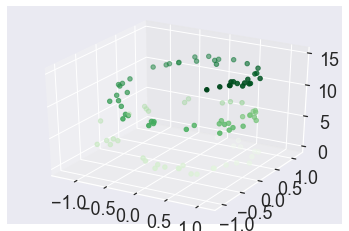

In [9]:
fig = plt.figure()
ax = plt.gca(projection='3d')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

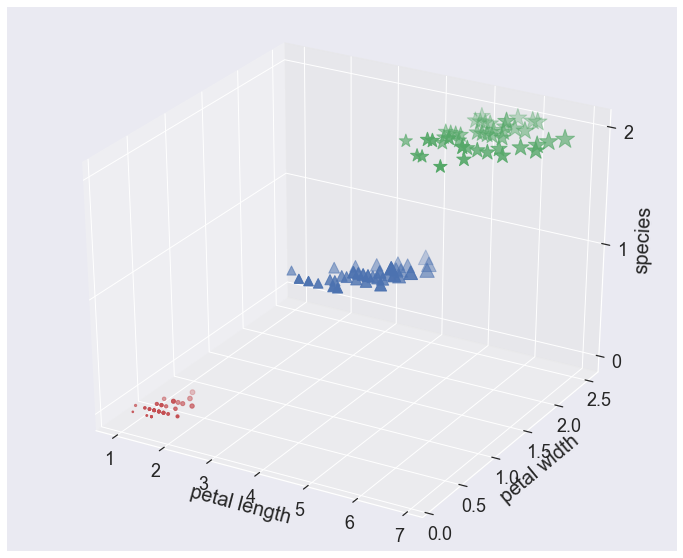

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = pd.read_csv('data/iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})
x, y, z = iris['petal_length'],  iris['petal_width'], iris['species']

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

for name, c, marker in zip((0, 1, 2), ('r', 'b', 'g'), ('o', '^', '*')):
    index = iris['species'] == name
    ax.scatter(x[index], y[index], z[index], s=25*x[index]*y[index], c=c, marker=marker)

ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_zlabel('species')
ax.set_zticks([0, 1, 2])

# Animate the above 3D plot. 
# Since animation does not work inline/notebook, use one of the interactive backends

#import matplotlib
#matplotlib.use('tkAgg')

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.pause(.001)

plt.show();

## 3D surface

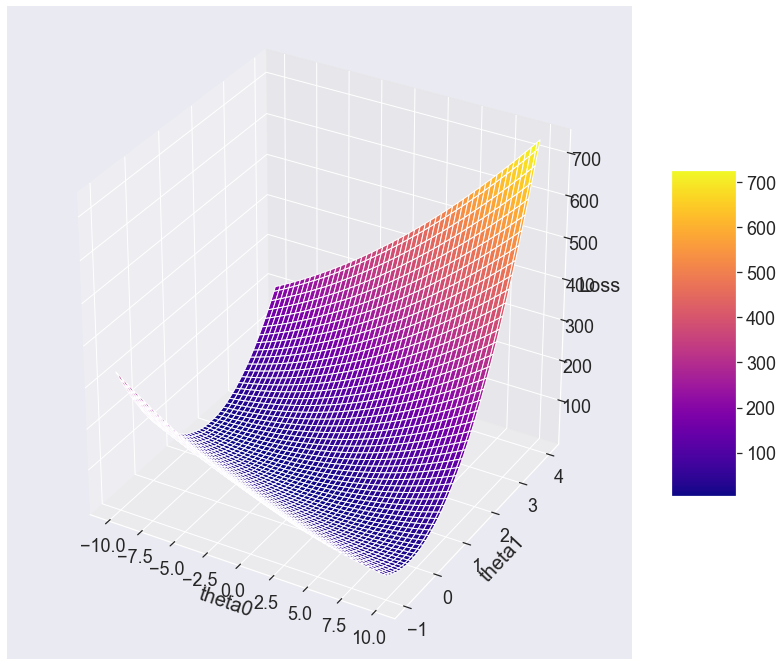

In [25]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(14,12))
ax = fig.gca(projection='3d')

# Read Loss, theta0 and theta1 values
Loss = pd.read_excel('data/Loss.xlsx')
theta0_vals = pd.read_excel('data/theta0.xlsx')
theta1_vals = pd.read_excel('data/theta1.xlsx')

X, Y = np.meshgrid(theta0_vals, theta1_vals)

# Plot surface graph
surf = ax.plot_surface(X, Y, Loss, cmap='plasma')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Loss')

plt.show()

## Contour

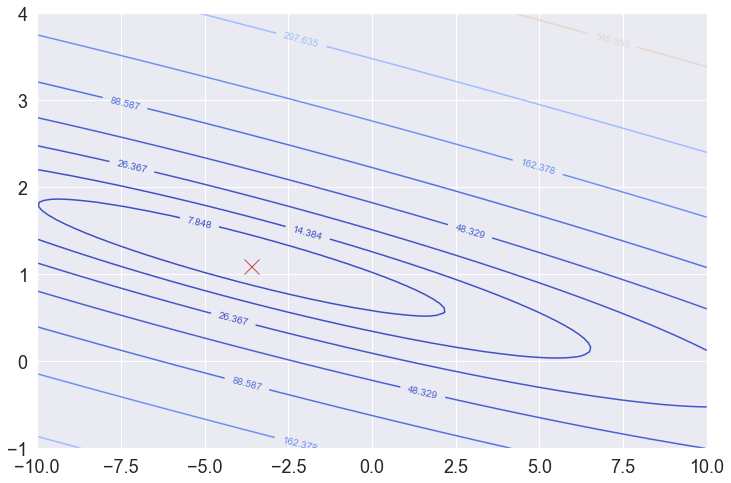

In [13]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

# Read Loss, theta0 and theta1 values
Loss = pd.read_excel('data/Loss.xlsx')
theta0_vals = pd.read_excel('data/theta0.xlsx')
theta1_vals = pd.read_excel('data/theta1.xlsx')

fig = plt.figure(figsize=(12,8))
X, Y = np.meshgrid(theta0_vals, theta1_vals)
CS = plt.contour(X, Y, Loss, np.logspace(-2,3,20), cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)

# Plot the minimum point(Theta at Minimum cost)
theta = [-3.6, 1.1]
plt.plot(theta[0], theta[1], 'rx', markersize=15, linewidth=2)
plt.show()

# Advanced plots

## Stream plot

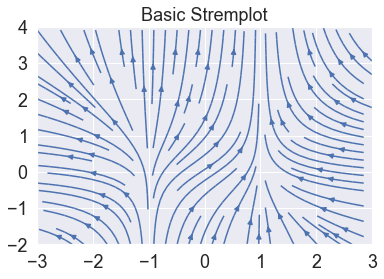

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

x, y = np.linspace(-3,3,100), np.linspace(-2,4,50)
X, Y = np.meshgrid(x, y)
U = 1 - X**2 
V = 1 + Y**2 
plt.streamplot(X, Y, U, V)
plt.title('Basic Stremplot')
plt.show()

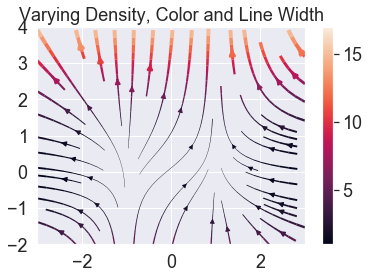

In [15]:
# Define the speed as a function of U amd V
speed = np.sqrt(U*U + V*V)
#  Varying line width along a streamline
lw = 5*speed / speed.max()
strm = plt.streamplot(X, Y, U, V, density=[0.5, 1], color=V, linewidth=lw)
plt.colorbar(strm.lines)
plt.title('Varying Density, Color and Line Width')
plt.show()